### Importing the Libraries

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Erosion

In [65]:
def apply_erosion_operation(image, structuring_element):
    eroded_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape

    for r in range(height):
        nth_row = []
        for c in range(width):
            fit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (structuring_element[x, y] == 1 and image[r + x, c + y] != structuring_element[x, y]):
                            fit = False
            pixel = 1 if fit else 0
            nth_row.append(pixel)
        eroded_image.append(nth_row)

    image = image * 255
    eroded_image = np.uint8(eroded_image)
    return eroded_image * 255

### Function for Dilation

In [66]:
def apply_dilation_operation(image, structuring_element):
    dilated_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape

    for r in range(height):
        nth_row = []
        for c in range(width):
            hit = False
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (structuring_element[x, y] == 1 and image[r + x, c + y] == structuring_element[x, y]):
                            hit = True
            pixel = 1 if hit else 0
            nth_row.append(pixel)
        dilated_image.append(nth_row)

    image = image * 255
    dilated_image = np.uint8(dilated_image)
    return dilated_image * 255

### Function for Opening 

In [67]:
def apply_opening_operation(image, structuring_element):
    opened_image = apply_erosion_operation(image, structuring_element)
    opened_image = apply_dilation_operation(opened_image, structuring_element)
    return opened_image

### Function for Closing

In [68]:
def apply_closing_operation(image, structuring_element):
    closed_image = apply_dilation_operation(image, structuring_element)
    closed_image = apply_erosion_operation(closed_image, structuring_element)
    return closed_image

### Creating Structuring Element for Erosion & Dilation

In [69]:
structuring_element_size = 3
structuring_element = np.ones((structuring_element_size, structuring_element_size))
structuring_element = np.uint8(structuring_element)

### Loading the Original Image

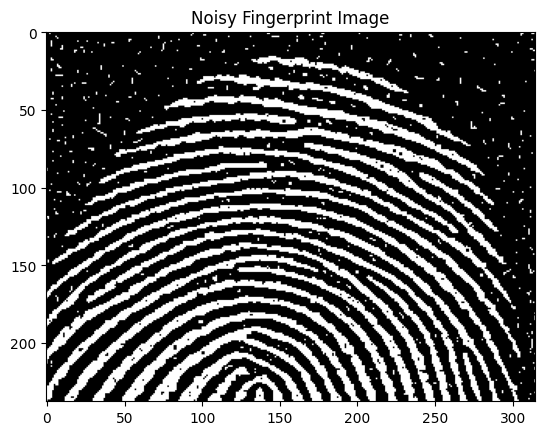

In [70]:
noisy_fingerprint = cv2.imread("./Fig0911(a) Noisy Fingerprint 315x238.tif", 0)
plt.imshow(cv2.cvtColor(noisy_fingerprint, cv2.COLOR_BGR2RGB))
plt.title("Noisy Fingerprint Image")
plt.show()

### Applying Opening Operation

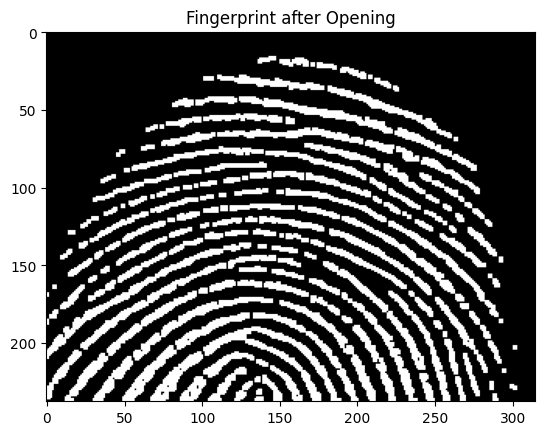

In [71]:
opened_fingerprint = apply_opening_operation(noisy_fingerprint, structuring_element)
plt.imshow(cv2.cvtColor(opened_fingerprint, cv2.COLOR_BGR2RGB))
plt.title("Fingerprint after Opening")
plt.show()

### Applying Closing Operation

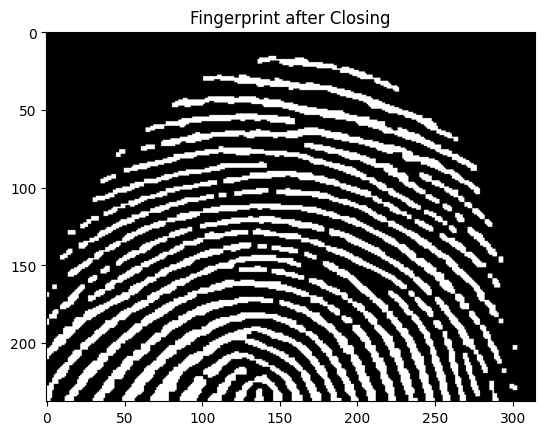

In [72]:
closed_fingerprint = apply_closing_operation(opened_fingerprint, structuring_element)
plt.imshow(cv2.cvtColor(closed_fingerprint, cv2.COLOR_BGR2RGB))
plt.title("Fingerprint after Closing")
plt.show()